In [1]:
from networkx.algorithms import bipartite
from collections import defaultdict
import os
import pickle
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\ersin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
m1 = pd.read_csv("final_results_1.csv", index_col=0)
m2 = pd.read_csv("final_results_2.csv", index_col=0)
m3 = pd.read_csv("final_results_3.csv", index_col=0)
m4 = pd.read_csv("final_results_4.csv", index_col=0)

df = m1.merge(m2, how='left', on ='date')
df = df.merge(m3, how='left', on ='date')
df = df.merge(m4, how='left', on ='date')

def drop_cols(df, substring):
    return df.loc[:, ~df.columns.str.contains(substring)]

def create_dataframe_with_substring(df, substring):
    filtered_columns = [col for col in df.columns if substring in col]
    return df[filtered_columns]

substring = "weakly_connected_components"
df = drop_cols(df.copy(), substring)
substring = "sector"
df = drop_cols(df.copy(), substring)

In [3]:
df

,date,total_graph_density,total_graph_avg_degree,total_graph_clustering,total_graph_late_filing_percentage,total_graph_significant_change_percentage,software_industry_density,software_industry_avg_degree,software_industry_clustering,software_industry_late_filing_percentage,...,real_estate_industry_big_buy_percentage,real_estate_industry_big_sale_percentage,total_graph_early_filing_percentage,total_graph_on_filing_percentage,software_industry_early_filing_percentage,software_industry_on_filing_percentage,oil_industry_early_filing_percentage,oil_industry_on_filing_percentage,real_estate_industry_early_filing_percentage,real_estate_industry_on_filing_percentage
0,1999-06-30,0.000974,19.387012,0.014158,0.279530,0.088784,0.014441,17.561748,0.017607,0.276668,...,0.386127,0.139738,0.720470,0.000000,0.723332,0.000000,0.713644,0.000000,0.669802,0.000000
1,1999-09-30,0.000900,17.900193,0.012776,0.292255,0.073596,0.013403,17.306533,0.021164,0.301176,...,0.279009,0.210306,0.707745,0.000000,0.698824,0.000000,0.709769,0.000000,0.659676,0.000000
2,1999-12-31,0.000927,18.438498,0.014172,0.168859,0.081286,0.014538,19.617473,0.019919,0.175975,...,0.321650,0.188776,0.573689,0.257452,0.561808,0.262217,0.577414,0.264180,0.567214,0.273292
3,2000-03-31,0.001008,20.054701,0.012295,0.086637,0.079791,0.014573,20.802832,0.019054,0.081741,...,0.268666,0.231118,0.674258,0.239106,0.665497,0.252762,0.655838,0.255566,0.622356,0.276867
4,2000-06-30,0.001050,20.891933,0.013257,0.223397,0.075963,0.013362,19.336607,0.022440,0.228360,...,0.364997,0.179764,0.616102,0.160501,0.605349,0.166290,0.611111,0.169808,0.607657,0.171128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2016-09-30,0.001950,38.801325,0.017456,0.070950,0.062542,0.019561,17.596423,0.019133,0.064961,...,0.264916,0.213149,0.520453,0.408597,0.496929,0.438110,0.495047,0.427443,0.543095,0.380162
70,2016-12-31,0.002127,42.321974,0.020901,0.057055,0.067252,0.019412,17.289435,0.018373,0.055300,...,0.293276,0.192961,0.599609,0.343337,0.584714,0.359986,0.569619,0.371718,0.612170,0.331216
71,2017-03-31,0.002074,41.267718,0.019913,0.025067,0.068577,0.019327,16.884558,0.019308,0.026949,...,0.280551,0.200014,0.646034,0.328898,0.622270,0.350781,0.608431,0.368322,0.658419,0.315835
72,2017-06-30,0.002017,40.135318,0.017707,0.055357,0.062990,0.019664,17.688956,0.019813,0.053092,...,0.277635,0.203024,0.612661,0.331982,0.602999,0.343909,0.588995,0.354552,0.621325,0.323424


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_dataframe(df_clustering, title): 

    # Convert the index to datetime
    df_clustering.index = pd.to_datetime(df_clustering.index)

    dot_com_start = '2000-06-30'
    dot_com_end = '2002-12-31'

    financial_start = '2007-12-31'
    financial_end = '2009-12-31'

    oil_start = '2014-06-30'
    oil_end = '2016-03-31'

    # Plotting
    ax = df_clustering.plot(kind="line", figsize=(20, 6), style=["-", "-", "-", "-", "--", "--", "--"], legend=True)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Value")

    # Set x-axis labels to each date in the DataFrame's index, skipping one by one
    xticks_labels = df_clustering.index[::2]  # Change the number '2' to skip more/less
    plt.xticks(ticks=xticks_labels, labels=[label.strftime('%Y-%m-%d') for label in xticks_labels], rotation=45)

    # Apply colored spans
    ax.axvspan(pd.to_datetime(dot_com_start), pd.to_datetime(dot_com_end), color='yellow', alpha=0.3, label='Dot-com Bubble')
    ax.axvspan(pd.to_datetime(financial_start), pd.to_datetime(financial_end), color='orange', alpha=0.3, label='2008 Financial Crisis')
    ax.axvspan(pd.to_datetime(oil_start), pd.to_datetime(oil_end), color='red', alpha=0.3, label='Oil Price Shock')

    plt.grid(True)
    plt.show()




# DENSITY

In [5]:
dfd

NameError: name 'dfd' is not defined

In [ ]:
dfd = create_dataframe_with_substring(df, "density")
substring = "total"
dfd = drop_cols(dfd.copy(), substring)
plot_dataframe(dfd, "Graph Density of Selected Industry Groups Over Time")

# DEGREE

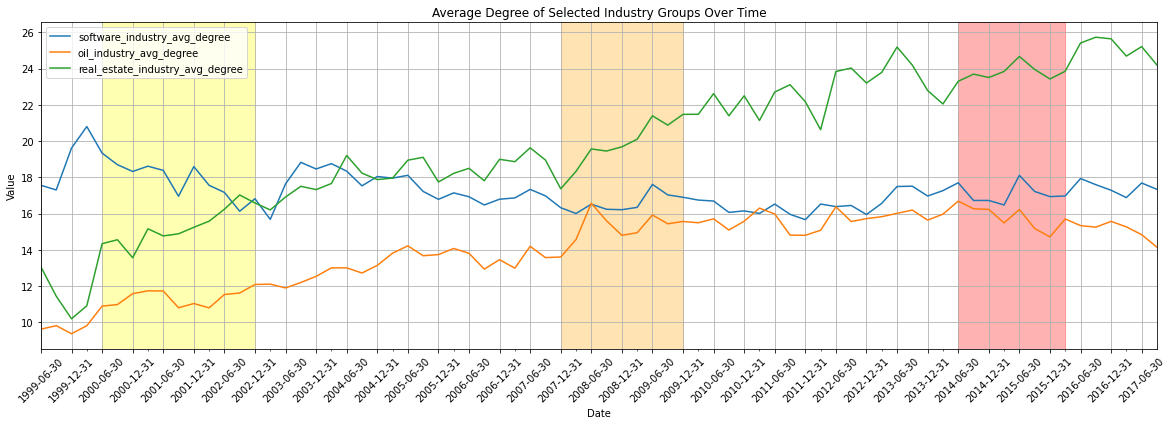

In [64]:
df2 = create_dataframe_with_substring(df, "avg_degree")
substring = "total"
df2 = drop_cols(df2.copy(), substring)
plot_dataframe(df2, "Average Degree of Selected Industry Groups Over Time")

# CLUSTERING

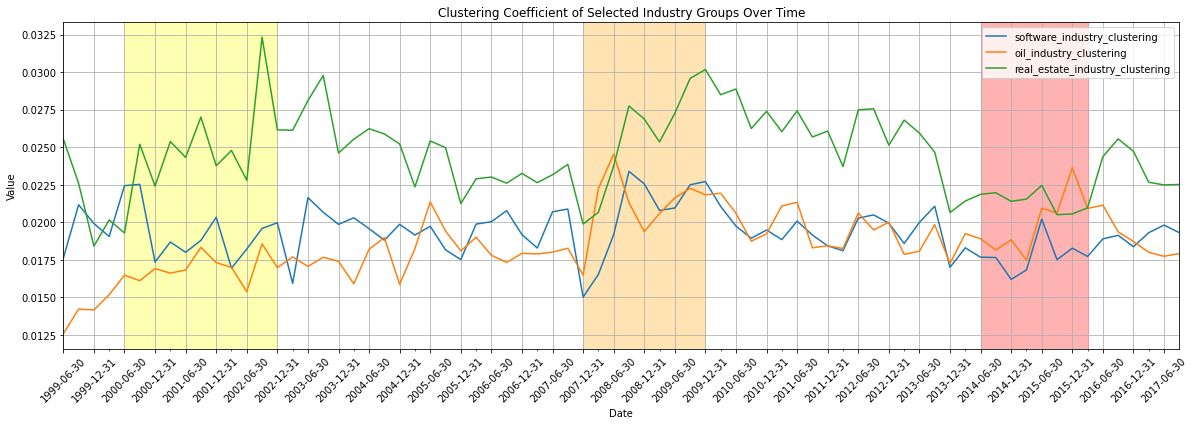

In [63]:
df3 = create_dataframe_with_substring(df, "clustering")
substring = "total"
df3 = drop_cols(df3.copy(), substring)
plot_dataframe(df3, "Clustering Coefficient of Selected Industry Groups Over Time")


# COMPONENTS

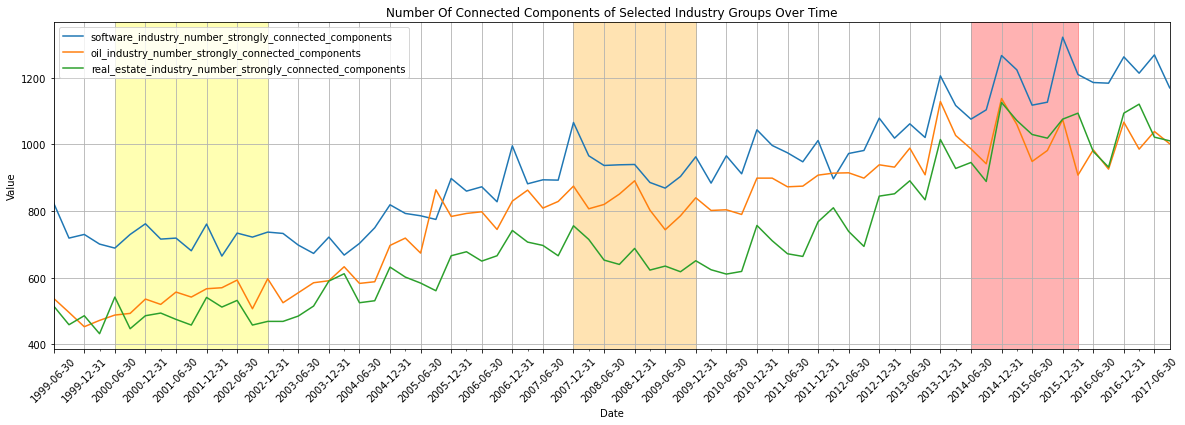

In [62]:
df4 = create_dataframe_with_substring(df, "components")
substring = "total"
df4 = drop_cols(df4.copy(), substring)
plot_dataframe(df4, "Number Of Connected Components of Selected Industry Groups Over Time")


# graphs

In [1]:
from networkx.algorithms import bipartite
from collections import defaultdict
import os
import pickle
import networkx as nx
import pandas as pd
from tqdm import tqdm
from dotmotif import Motif, GrandIsoExecutor

filename = "graph_1999-06-30.pkl"
folder_path = "C:\\Users\\ersin\\KOD\\tez_v7\\quarterly_graphs2"
file_path = os.path.join(folder_path, filename)
G = pickle.load(open(file_path, 'rb'))


print(bipartite.is_bipartite(G))

C:\Users\ersin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


False


In [2]:
for idx, edge in enumerate(G.edges(data=True)):
    print(edge)
    source, target, edge_attrs = edge
    print(edge[2]['share_change'])
    if idx == 500:
        break

('1 800 CONTACTS INC', 'VANGUARD GROUP INC', {'quarter': Timestamp('1999-06-30 00:00:00'), 'share_change': 'Large Buy', 'filing_delay': 'early', 'direction': 'stock_to_investor', 'sector': 'Retail Trade', 'industry': 'Retail-Catalog & Mail-Order Houses', 'volume_category': nan, 'volatility_category': nan, 'quarterly_price': nan})
Large Buy
('1 800 CONTACTS INC', 'DIMENSIONAL FUND ADVISORS INC', {'quarter': Timestamp('1999-06-30 00:00:00'), 'share_change': 'Large Buy', 'filing_delay': 'early', 'direction': 'stock_to_investor', 'sector': 'Retail Trade', 'industry': 'Retail-Catalog & Mail-Order Houses', 'volume_category': nan, 'volatility_category': nan, 'quarterly_price': nan})
Large Buy
('1 800 CONTACTS INC', 'MORGAN STANLEY DEAN WITTER & CO', {'quarter': Timestamp('1999-06-30 00:00:00'), 'share_change': 'Large Buy', 'filing_delay': 'early', 'direction': 'stock_to_investor', 'sector': 'Retail Trade', 'industry': 'Retail-Catalog & Mail-Order Houses', 'volume_category': nan, 'volatility_c